In [72]:
from locale import normalize

import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import numpy as np
from numpy import sum
from sklearn.preprocessing import MinMaxScaler

# READ DATASET

# ANTARA MAU LEWAT DOWNLOAD LANGSUNG ATAU DOWNLOAD DULU KE LOCAL BEBAS

In [2]:
data_path = "C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets" # Ganti berdasarkan path kalian simpen dimana

files = []
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

print(files)

['C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_customers_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_geolocation_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_orders_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_order_items_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_order_payments_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_order_reviews_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_products_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\olist_sellers_dataset.csv', 'C:/Users/pudge/OneDrive/Desktop/skripsi/Dataset-Thesis/datasets\\product_category_name_translation.csv']


# Ambil Dataset yang relevan dan di merge

In [3]:
# Read dataset
orders = pd.read_csv(f'{data_path}/olist_orders_dataset.csv')
pd_dataset = pd.read_csv(f'{data_path}/olist_order_payments_dataset.csv')
or_dataset = pd.read_csv(f'{data_path}/olist_order_reviews_dataset.csv')
oi_dataset = pd.read_csv(f'{data_path}/olist_order_items_dataset.csv')

In [4]:
# Sanity Data FORMAT (ENTRIES, COLUMN)
print(f'orders dataset shape: {orders.shape}')
print(f'orders review dataset shape : {or_dataset.shape}')
print(f'orders payment dataset shape : {pd_dataset.shape}')
print(f'orders items dataset shape : {oi_dataset.shape}')

orders dataset shape: (99441, 8)
orders review dataset shape : (99224, 7)
orders payment dataset shape : (103886, 5)
orders items dataset shape : (112650, 7)


# Sebelum ke missing di merge dlu 3 dataset ini baru cleaning dll

In [6]:
#Merging order dataset with order payment dataset
merge_ds = pd.merge(orders, pd_dataset, on='order_id', how='inner')
merge_ds.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [7]:
#Merging order dataset with order review dataset
merge_lagi = pd.merge(merge_ds, oi_dataset, on='order_id', how='inner')
merge_lagi.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [9]:
merge_lagi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   payment_sequential             117601 non-null  int64  
 9   payment_type                   117601 non-null  object 
 10  payment_installments           117601 non-null  int64  
 11  payment_value                  117601 non-null  float64
 12  order_item_id                 

# Setelah merge ini, pilih columnya terus perform cleaning
# 1. treat missing valuenya (better di impute aja karena dikit)
# 2. Remove duplicatenya
# 3. kalo udah selesai cleaning dsb, dan udah pasti cuma bakal pake 3 dataset yang sekarang aja, bisa di save
# 4. Setelah save baru lanjut modelling
# 5. Profit

In [10]:
# Nyari Missing Valuesnya
print("Count of missing values: ")
display(merge_lagi.isnull().sum())

Count of missing values: 


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [11]:
# Hitung persentase missing values
merge_lagi.isnull().sum()/merge_lagi.shape[0] * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012755
order_delivered_carrier_date     1.058664
order_delivered_customer_date    2.182805
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
dtype: float64

In [12]:
# Cari berapa banyak data yang duplicate 
merge_lagi.duplicated().sum()

0

In [13]:
# Finding Garbage
# Print unique values for each column
for i in merge_lagi.select_dtypes(include="object").columns:
    print(f"Columns : {i}")
    print(merge_lagi[i].value_counts())
    print("***"*10)

Columns : order_id
order_id
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
a3725dfe487d359b5be08cac48b64ec5    24
                                    ..
f2b0b1751d796ee3bf5df90cb7c1c213     1
2eadb8e36b6d6465dc9e2e3f3b95751d     1
1373f8a3742861c26892cc2aab7c41e1     1
1e6df4ea0f78bcf1e9e1a3abf97f28e1     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: count, Length: 98665, dtype: int64
******************************
Columns : customer_id
customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
d22f25a9fadfb1abbc2e29395b1239f4    24
                                    ..
fc329f76b6bbfcdb6faafd1ec6c2dcc2     1
a71faac9f56802e89e3ae192fd53f1af     1
630b189fb0c73900cf3360c4a795680e     1
462903f7a882d16b16e174dfec5aece4     1
edb027a75a1449115f6b43211ae02a24     1
Name: co

EDA

In [14]:
#Descriptive Analysis
merge_lagi.describe(include='object')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,product_id,seller_id,shipping_limit_date
count,117601,117601,117601,117601,117586,116356,115034,117601,117601,117601,117601,117601
unique,98665,98665,7,98111,90173,81016,95663,449,4,32951,3095,93317
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,credit_card,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31
freq,63,63,115035,63,63,63,63,649,86769,536,2133,63


In [39]:
print(merge_lagi.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64


In [19]:
# print merge_lagi rows where it's null
merge_lagi[merge_lagi.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,credit_card,1,65.95,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
51,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,1,boleto,1,22.36,1,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87
125,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,1,boleto,1,50.35,1,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.00,15.35
155,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00,1,credit_card,2,138.28,1,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.90,12.38
192,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,1,boleto,1,69.12,1,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117246,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26 00:00:00,1,credit_card,2,113.34,1,aa428a8e4d587520f90d37a08030a812,b2ba3715d723d245138f291a6fe42594,2018-01-02 22:05:26,96.90,16.44
117255,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00,1,credit_card,3,333.62,1,dc2410804cf782c5d87dbcd201b74e9b,897060da8b9a21f655304d50fd935913,2017-10-05 22:35:22,150.00,16.81
117256,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00,1,credit_card,3,333.62,2,dc2410804cf782c5d87dbcd201b74e9b,897060da8b9a21f655304d50fd935913,2017-10-05 22:35:22,150.00,16.81
117298,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaN,2018-03-14 00:00:00,1,boleto,1,224.71,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2018-02-26 07:11:31,179.00,45.71


In [32]:
# Impute missing values
merge_lagi["order_delivered_carrier_date"].ffill(inplace=True)
merge_lagi["order_delivered_customer_date"].ffill(inplace=True)
merge_lagi["order_approved_at"].ffill(inplace=True)

In [33]:
# print merge_lagi rows where it's null
merge_lagi[merge_lagi.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [35]:
#DAMNNNN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
merge_lagi.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,117601,117601,117601,117601,117601,117601,117601,117601,117601.000000,117601,117601.000000,117601.000000,117601.000000,117601,117601,117601,117601.000000,117601.000000
unique,98665,98665,7,98111,90173,81016,95663,449,NaN,4,NaN,NaN,NaN,32951,3095,93317,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN
freq,63,63,115035,63,63,63,63,649,NaN,86769,NaN,NaN,NaN,536,2133,63,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.093528,NaN,2.939482,172.686752,1.195900,NaN,NaN,NaN,120.824783,20.045990
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726692,NaN,2.774223,267.592290,0.697706,NaN,NaN,NaN,184.479323,15.861315
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,60.870000,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,108.210000,1.000000,NaN,NaN,NaN,74.900000,16.290000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,189.260000,1.000000,NaN,NaN,NaN,134.900000,21.190000


In [37]:
# Print merge_lagi rows 
merge_lagi.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


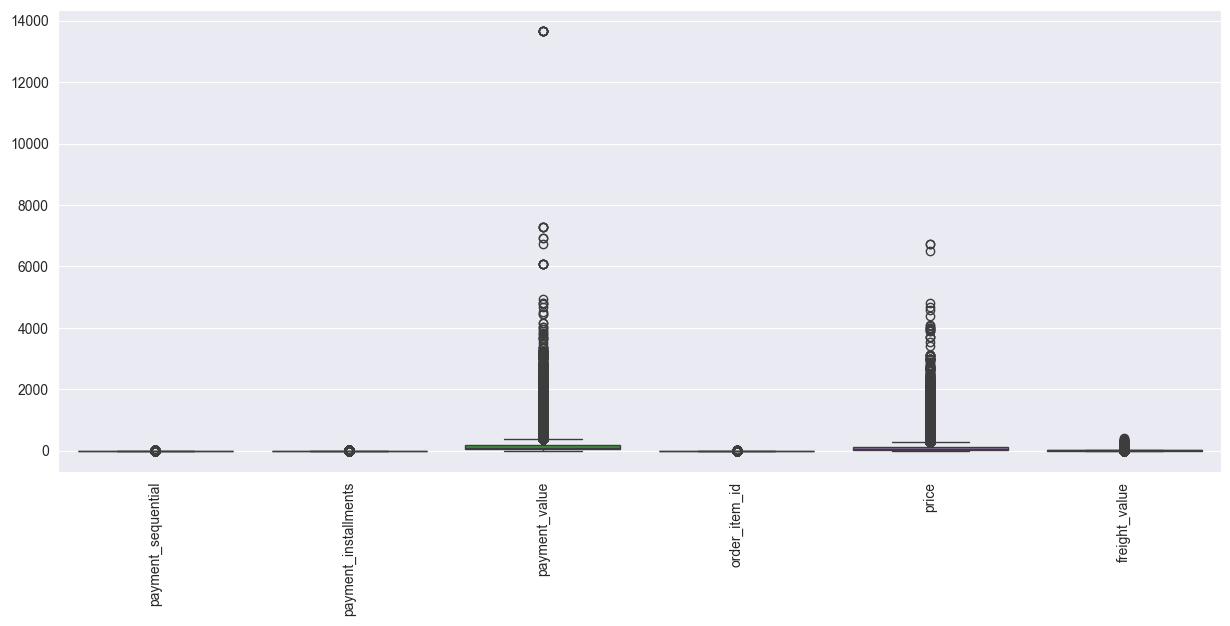

In [38]:
# Box plot to identify outliers 
plt.figure(figsize=(15, 6))
sns.boxplot(data=merge_lagi.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

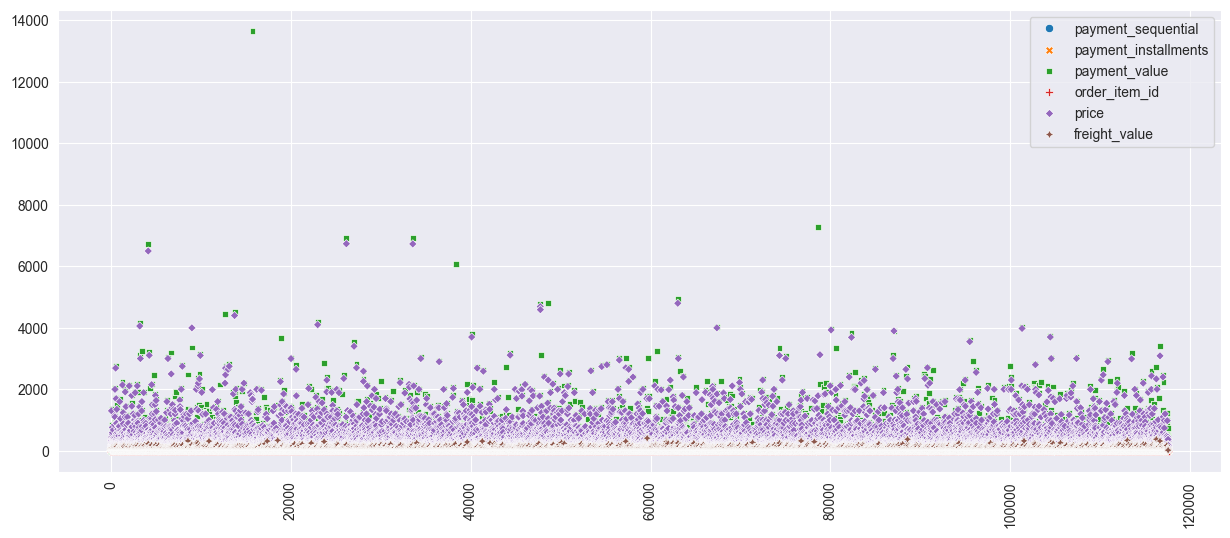

In [41]:
# Scatter Plot to identify outliers
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merge_lagi.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

In [46]:
# Z-Score to identify outliers
z = np.abs(stats.zscore(merge_lagi.select_dtypes(include=['number'])))
print(np.where(z > 3))

(array([    20,     20,     20, ..., 117508, 117508, 117563], dtype=int64), array([2, 4, 5, ..., 2, 4, 5], dtype=int64))


In [54]:
# Total number of outliers across all columns
outlier_count = sum(z > 3, axis=None)
print(f"Total number of outliers: \n{outlier_count}")

Total number of outliers: 
payment_sequential      1028
payment_installments     403
payment_value           1830
order_item_id           1932
price                   2085
freight_value           2137
dtype: int64


C:\Users\pudge\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [68]:
# Duplicate data frame
removed_outlier_df = merge_lagi.copy()


In [69]:
# Interquartile Range (IQR) to identify outliers
numeric_df = removed_outlier_df.select_dtypes(include=['number'])
print("PRE OUTLIER REMOVAL SHAPE:", removed_outlier_df.shape)

Q1 = removed_outlier_df.select_dtypes(include=['number']).quantile(0.25)
Q3 = removed_outlier_df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# DETECT OUTLIERS
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

removed_outlier_df = removed_outlier_df[~outliers.any(axis=1)]
print("POST OUTLIER REMOVAL SHAPE:", removed_outlier_df.shape)

PRE OUTLIER REMOVAL SHAPE: (117601, 18)
POST OUTLIER REMOVAL SHAPE: (78649, 18)


In [61]:
# Print outliers
print(outliers)

        payment_sequential  payment_installments  payment_value  \
0                    False                 False          False   
1                     True                 False          False   
2                     True                 False          False   
3                    False                 False          False   
4                    False                 False          False   
...                    ...                   ...            ...   
117596               False                 False          False   
117597               False                 False          False   
117598               False                 False           True   
117599               False                 False           True   
117600               False                 False          False   

        order_item_id  price  freight_value  
0               False  False          False  
1               False  False          False  
2               False  False          False  
3          

In [62]:
# Remove outliers with Z-Score
removed_outlier_df = removed_outlier_df[(z < 3).all(axis=1)]

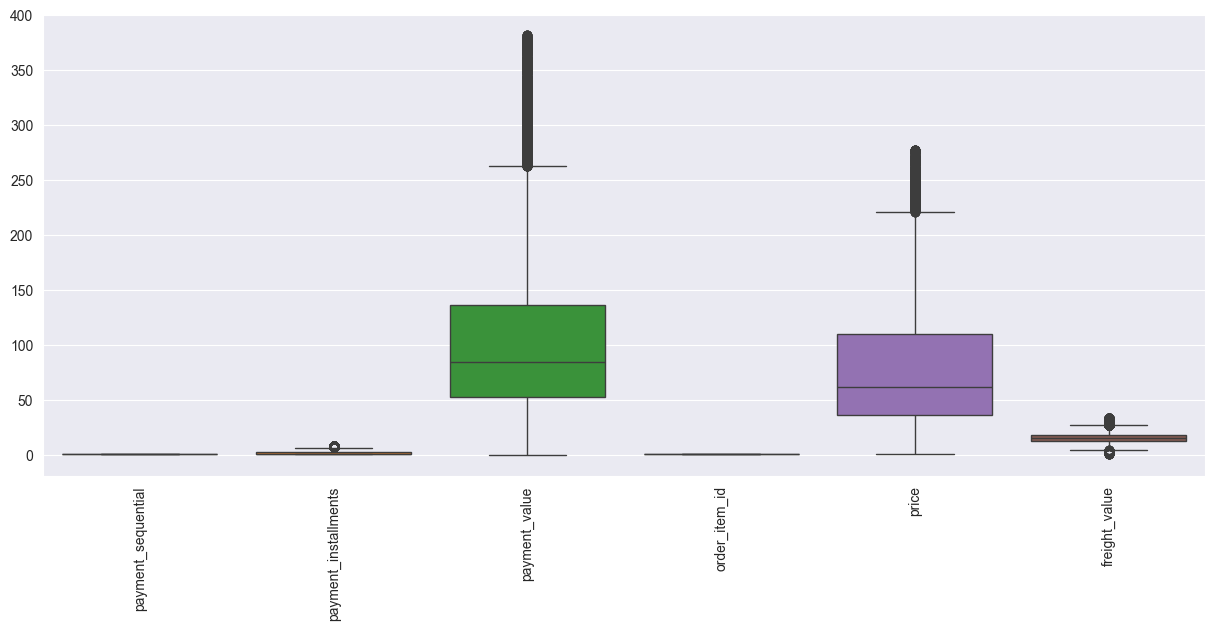

In [70]:
# Box plot post removed outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=removed_outlier_df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

In [73]:
# NORMALIZE DATA
scaler = MinMaxScaler()
normiez = scaler.fit_transform(removed_outlier_df.select_dtypes(include=['number']))

normalized_df = pd.DataFrame(normiez, columns=removed_outlier_df.select_dtypes(include=['number']).columns)
print("RAW DATA")
print(removed_outlier_df.select_dtypes(include=['number']).head())
print("NORMALIZED DATA")
print(normalized_df.head())

RAW DATA
   payment_sequential  payment_installments  payment_value  order_item_id  \
0                   1                     1          18.12              1   
3                   1                     1         141.46              1   
4                   1                     3         179.12              1   
5                   1                     1          72.20              1   
6                   1                     1          28.62              1   

    price  freight_value  
0   29.99           8.72  
3  118.70          22.76  
4  159.90          19.22  
5   45.00          27.20  
6   19.90           8.72  
NORMALIZED DATA
   payment_sequential  payment_installments  payment_value  order_item_id  \
0                 0.0              0.000000       0.047448            0.0   
1                 0.0              0.000000       0.370598            0.0   
2                 0.0              0.285714       0.469267            0.0   
3                 0.0              0.00000

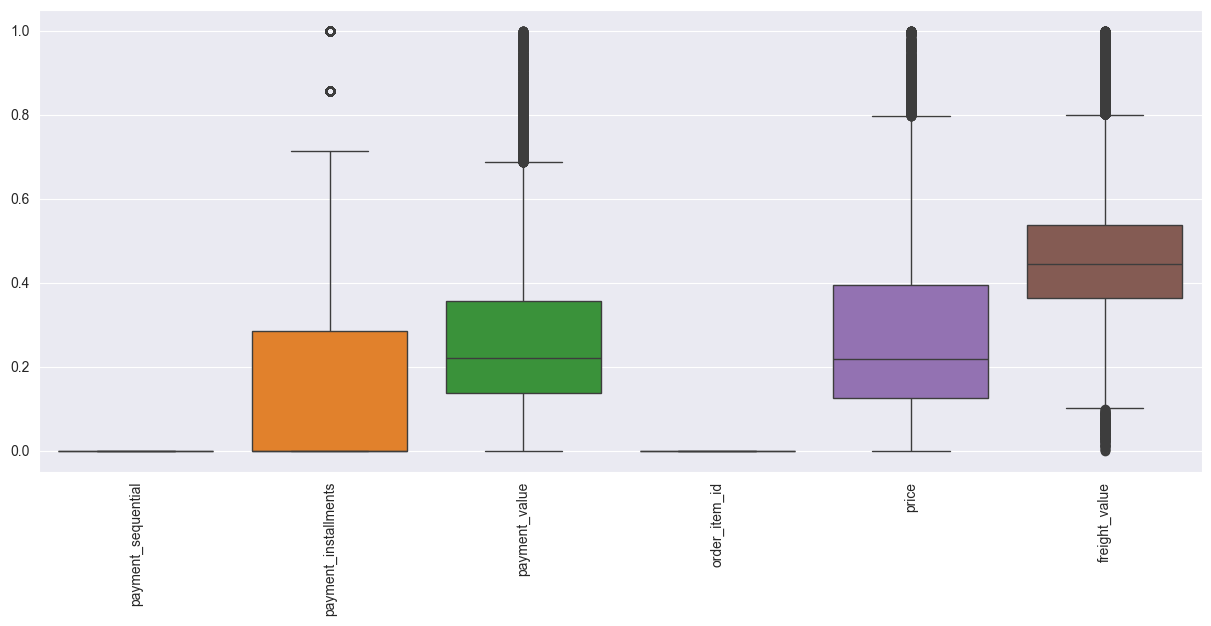

In [74]:
# BOX PLOT THAT THANG
plt.figure(figsize=(15, 6))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)
plt.show()